In [55]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
import plotly.graph_objects as go
from pprint import pprint
from collections import defaultdict
from json import load, dump
import os

In [2]:
data = defaultdict(list)
with open("mem_result.txt", "r") as f:
    while f.readable():
        f.readline()
        n = f.readline()
        num = re.match(r"^\[([0-9]{1,2})\]$" ,n).group(1)
        for i in range(4):
            value = np.float(f.readline().strip("\n"))
            data[num].append(value)
        if num == "60":
            break

In [3]:
x = list(map(int, data.keys()))
y = np.array(list(data.values()))

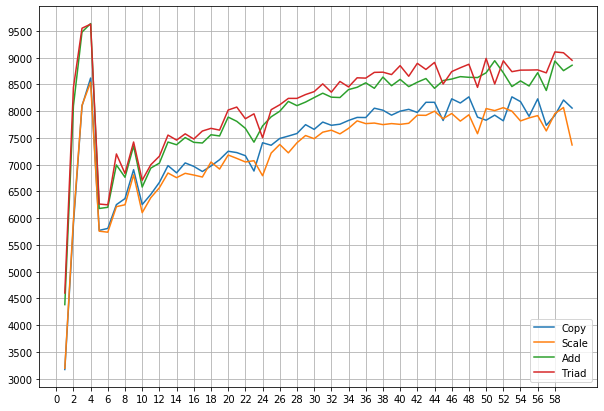

In [4]:
labels=["Copy", "Scale", "Add", "Triad"]
plt.figure(figsize=(10,7))
for i, l in enumerate(labels):
    plt.plot(x,y[:,i], label=l)
plt.legend()
plt.xticks(ticks=np.arange(0, len(data), 2));
plt.yticks(ticks=np.arange(3000, 10_000, 500));
plt.grid()

In [79]:
result_path = "../result/r100"
alg_files = os.listdir(result_path)
alg_res_regex = r"^(.*)-T([\d]{1,2})-R([\d]{1,3}).json$"
# print(alg_files)

data = dict()

for alg in alg_files:
    if ".json" not in alg:
        continue
    di = load(open(os.path.join(result_path, alg), 'r'))
    grps = re.match(alg_res_regex, alg)
    alg_name = grps.group(1)
    thread = int(grps.group(2))
    rounds = grps.group(3)
    
    alg_d = dict()
    if thread not in data:
        data[thread] = dict()

    for k, v in di.items():
        fn, nthr, func = list(map(str.strip, k.split(",")))
        size = 0
        try:
            size = int(re.match(r"^data/map/size-(\d{1,}).csv$", fn).group(1))
        except AttributeError:
            size = int(fn)
        if size not in alg_d:
            alg_d[size] = dict()
        alg_d[size][func] = (v["nanos"]/float(1e9)) + float(v["secs"])
    data[thread][alg_name] = alg_d
pprint(data)

{1: {'map': {1048576: {'half_split_Multiply': 0.004265042,
                       'rayon_par_iter_Multiply': 0.004640042,
                       'sqrt_n_Multiply': 0.004994104},
             2097152: {'half_split_Multiply': 0.025470202,
                       'rayon_par_iter_Multiply': 0.02432461,
                       'sqrt_n_Multiply': 0.02683791},
             8388608: {'half_split_Multiply': 0.103973944,
                       'rayon_par_iter_Multiply': 0.098626648,
                       'sqrt_n_Multiply': 0.1174208},
             16777216: {'half_split_Multiply': 0.200999264,
                        'rayon_par_iter_Multiply': 0.188566976,
                        'sqrt_n_Multiply': 0.231823648},
             33554432: {'half_split_Multiply': 0.377304384,
                        'rayon_par_iter_Multiply': 0.35714448,
                        'sqrt_n_Multiply': 0.432680576},
             67108864: {'half_split_Multiply': 0.739918272,
                        'rayon_par_iter_Multiply'

                      'par_quick_sort (rayon)': 0.03484243},
            4194304: {'par_quick_sort (in-place)': 0.07957946,
                      'par_quick_sort (non-in-place)': 0.224122481,
                      'par_quick_sort (rayon)': 0.066107051},
            8388608: {'par_quick_sort (in-place)': 0.157010951,
                      'par_quick_sort (non-in-place)': 0.447344855,
                      'par_quick_sort (rayon)': 0.124251973},
            16777216: {'par_quick_sort (in-place)': 0.32272472,
                       'par_quick_sort (non-in-place)': 0.893923414,
                       'par_quick_sort (rayon)': 0.247117096}},
     'sample_sort': {2: {'sample_sort par': 2.76e-07,
                         'sample_sort seq': 3.13e-07},
                     4: {'sample_sort par': 3.32e-07,
                         'sample_sort seq': 3.66e-07},
                     8: {'sample_sort par': 4.56e-07,
                         'sample_sort seq': 4.82e-07},
                     16: {'s

      'qs': {2: {'par_quick_sort (in-place)': 2.841e-06,
                 'par_quick_sort (non-in-place)': 3.245e-06,
                 'par_quick_sort (rayon)': 2.65e-07},
             4: {'par_quick_sort (in-place)': 2.799e-06,
                 'par_quick_sort (non-in-place)': 2.885e-06,
                 'par_quick_sort (rayon)': 2.1e-07},
             8: {'par_quick_sort (in-place)': 2.915e-06,
                 'par_quick_sort (non-in-place)': 2.978e-06,
                 'par_quick_sort (rayon)': 2.97e-07},
             16: {'par_quick_sort (in-place)': 3.069e-06,
                  'par_quick_sort (non-in-place)': 3.233e-06,
                  'par_quick_sort (rayon)': 4.9e-07},
             32: {'par_quick_sort (in-place)': 3.848e-06,
                  'par_quick_sort (non-in-place)': 4.591e-06,
                  'par_quick_sort (rayon)': 1.318e-06},
             64: {'par_quick_sort (in-place)': 5.446e-06,
                  'par_quick_sort (non-in-place)': 5.468e-06,
               

In [63]:
data[24]['qs']

{1024: {'par_quick_sort (in-place)': 71993.0,
  'par_quick_sort (non-in-place)': 71400.0,
  'par_quick_sort (rayon)': 69475.0},
 1048576: {'par_quick_sort (in-place)': 14952514.0,
  'par_quick_sort (non-in-place)': 64067410.0,
  'par_quick_sort (rayon)': 15777751.0},
 128: {'par_quick_sort (in-place)': 9016.0,
  'par_quick_sort (non-in-place)': 8957.0,
  'par_quick_sort (rayon)': 6421.0},
 131072: {'par_quick_sort (in-place)': 2181220.0,
  'par_quick_sort (non-in-place)': 23367428.0,
  'par_quick_sort (rayon)': 2174384.0},
 134217728: {'par_quick_sort (in-place)': 2226568969.0,
  'par_quick_sort (non-in-place)': 4350251667.0,
  'par_quick_sort (rayon)': 1694217853.0},
 16: {'par_quick_sort (in-place)': 3219.0,
  'par_quick_sort (non-in-place)': 3174.0,
  'par_quick_sort (rayon)': 500.0},
 16384: {'par_quick_sort (in-place)': 1146476.0,
  'par_quick_sort (non-in-place)': 1207959.0,
  'par_quick_sort (rayon)': 499658.0},
 16777216: {'par_quick_sort (in-place)': 258361425.0,
  'par_quick_

par_scan
rayon_sum


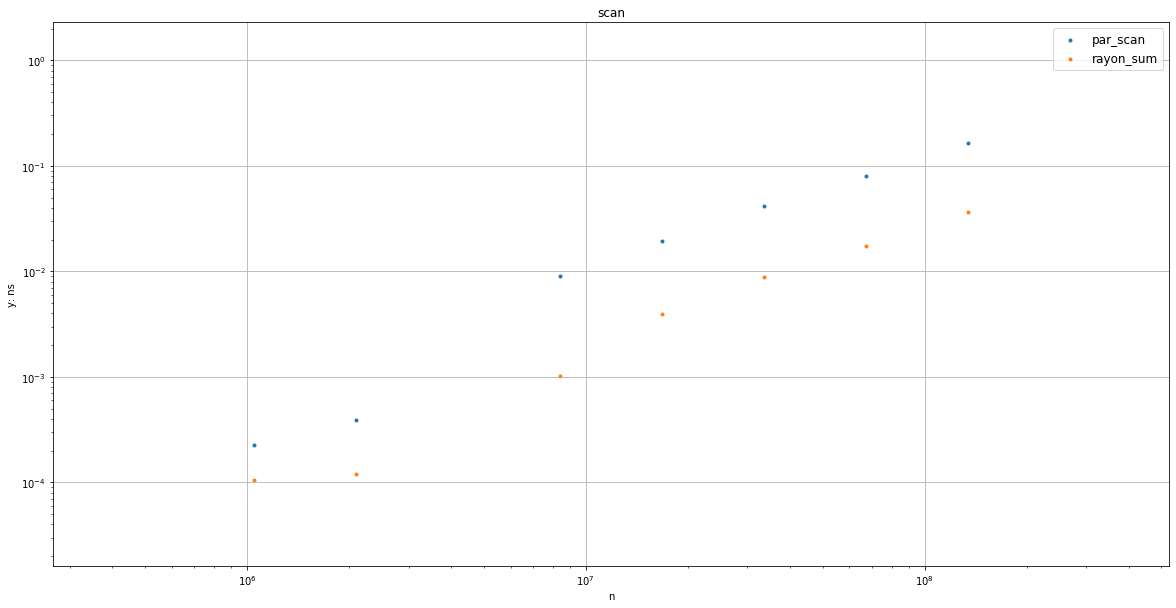

half_split_Multiply
rayon_par_iter_Multiply
sqrt_n_Multiply


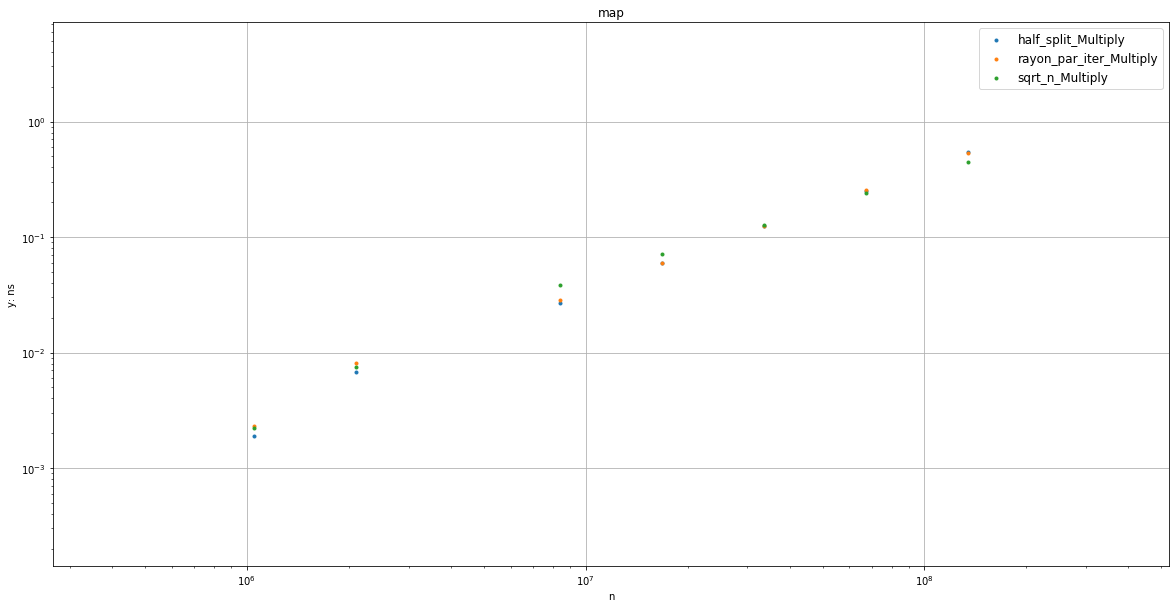

sample_sort par
sample_sort seq


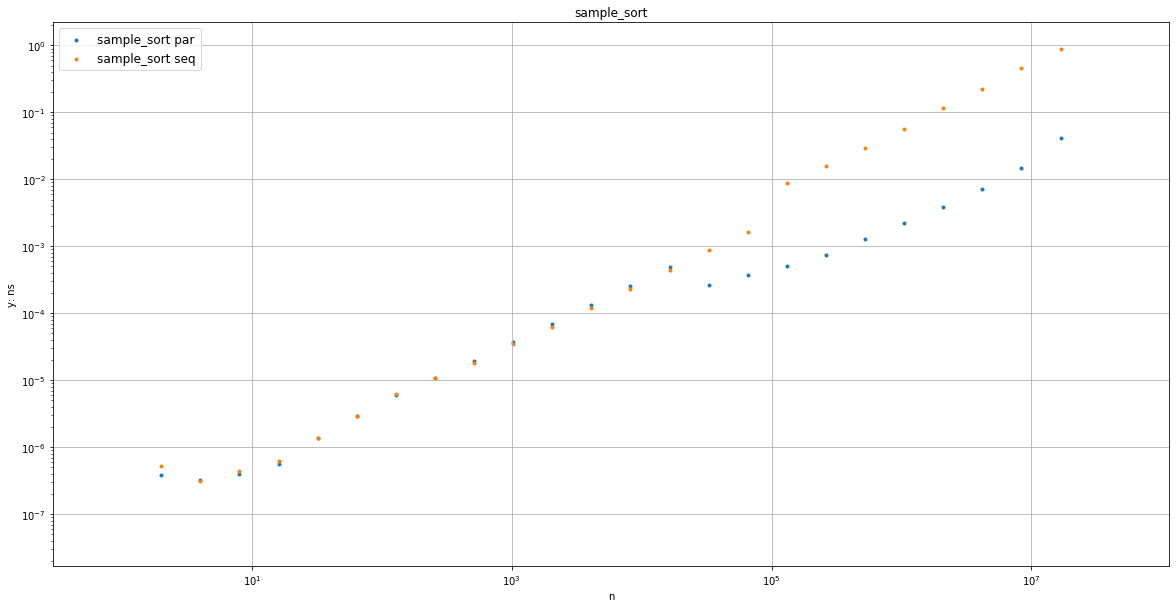

par_quick_sort (in-place)
par_quick_sort (non-in-place)
par_quick_sort (rayon)


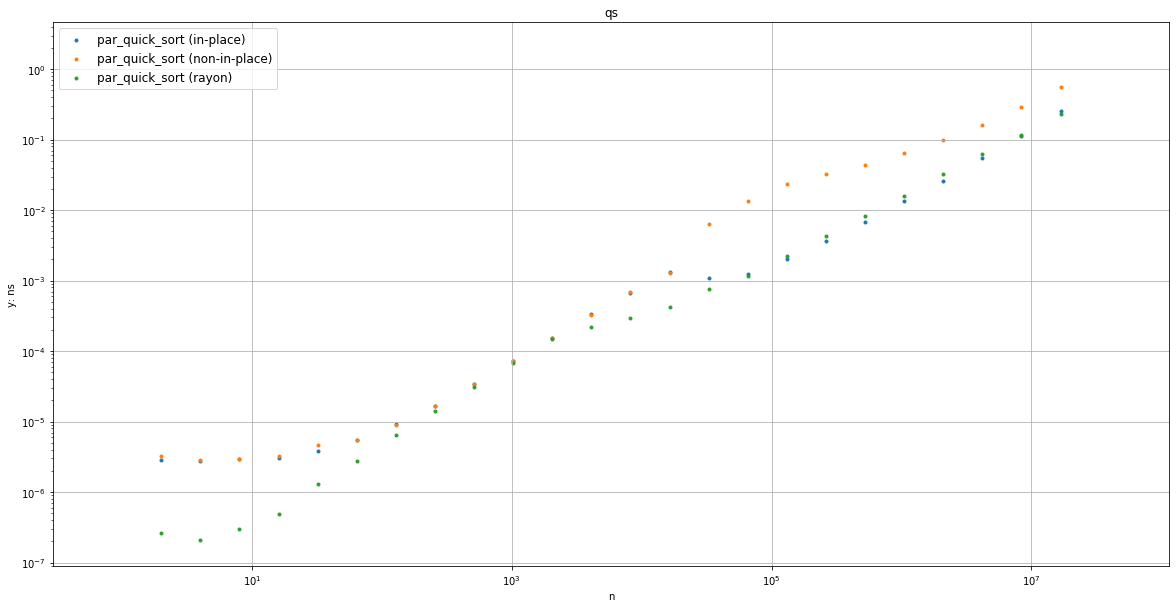

In [80]:
result = dict()
for alg, d in data[24].items():
    result[alg] = dict()
    for size, map_ver in d.items():
        for ver, tm in map_ver.items():
            if ver not in result[alg]:
                result[alg][ver] = {"x":[], "y": []}
            result[alg][ver]["x"].append(size)
            result[alg][ver]["y"].append(tm)

for alg, vers in result.items():
    plt.figure(figsize=(20,10))
    plt.title(alg)
    plt.xlabel("n")
    plt.ylabel("y: ns")
    plt.xscale("log")
    plt.yscale("log")
    for v, pts in vers.items():
        print(v)
        plt.scatter(pts['x'], pts['y'], label=v, marker='.')
    plt.legend(fontsize="large")
    plt.grid()
    plt.show()

In [67]:
## 3d plot
# result = dict()
# for tn, items in data.items():
#     for alg, d in items.items():
#         if alg not in result:
#             result[alg] = dict()
#         for size, map_ver in d.items():
#             for ver, tm in map_ver.items():
#                 if ver not in result[alg]:
#                     result[alg][ver] = {"x":[], "y": [], "z":[]}
#                 result[alg][ver]["x"].append(size)
#                 result[alg][ver]["y"].append(tm)
#                 result[alg][ver]["z"].append(tn)
# result

In [72]:
result = dict()

for thread, thread_data in data.items():
    for alg, d in thread_data.items():
        for size, map_ver in d.items():
            if size not in result:
                result[size] = dict()
            if alg not in result[size]:
                result[size][alg] = dict()
            for ver, tm in map_ver.items():
                if ver not in result[size][alg]:
                    result[size][alg][ver] = {"x":[], "y": [], "xy": []}
                result[size][alg][ver]["xy"].append((thread, tm))

for size, size_data in result.items():
    for alg, alg_d in size_data.items():
        for ver, ver_d in alg_d.items():
            sorted_xy = sorted(ver_d["xy"], key=lambda tup: tup[0])
            ver_d["x"] = list(map(lambda x: x[0], sorted_xy))
            y_tmp = list(map(lambda x: x[1], sorted_xy))
            ver_d["y"] = list(map(lambda x: y_tmp[0]/x, y_tmp))
            
result
# for alg, vers in result.items():
#     plt.figure(figsize=(20,10))
#     plt.title(alg)
#     plt.xlabel("n")
#     plt.ylabel("y: ns")
#     plt.xscale("log")
#     plt.yscale("log")
#     for v, pts in vers.items():
#         print(v)
#         plt.scatter(pts['x'], pts['y'], label=v, marker='.')
#     plt.legend(fontsize="large")
#     plt.grid()
#     plt.show()

{1024: {'sample_sort': {'sample_sort par': {'x': [1, 2, 4, 8, 12, 16, 20, 24],
    'y': [1.0,
     0.6830180835585118,
     0.43865972500333733,
     0.5858292583537082,
     0.592270257743904,
     0.4734772853584735,
     0.4528576772389896,
     0.6114788526464099],
    'xy': [(4, 52437.0),
     (20, 50793.0),
     (16, 48581.0),
     (2, 33677.0),
     (8, 39264.0),
     (12, 38837.0),
     (24, 37617.0),
     (1, 23002.0)]},
   'sample_sort seq': {'x': [1, 2, 4, 8, 12, 16, 20, 24],
    'y': [1.0,
     0.6906317381649664,
     0.9202006775009648,
     0.5987556150777043,
     0.6151641106492762,
     0.46296895562315277,
     0.46088095698301224,
     0.623800941805709],
    'xy': [(4, 23321.0),
     (20, 46563.0),
     (16, 46353.0),
     (2, 31073.0),
     (8, 35841.0),
     (12, 34885.0),
     (24, 34402.0),
     (1, 21460.0)]}},
  'qs': {'par_quick_sort (in-place)': {'x': [1, 2, 4, 8, 12, 16, 20, 24],
    'y': [1.0,
     0.9170967065240193,
     0.869248816956297,
     0.814858

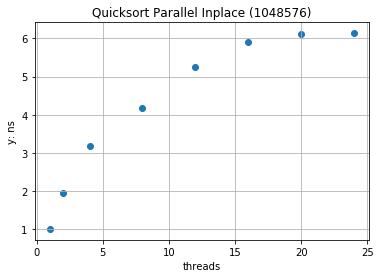

In [73]:
rr = result[1048576]['qs']['par_quick_sort (in-place)']
plt.title("Quicksort Parallel Inplace (1048576)")
plt.xlabel("threads")
plt.ylabel("y: ns")
plt.scatter(rr['x'], rr['y'], marker='o')
plt.grid(True)

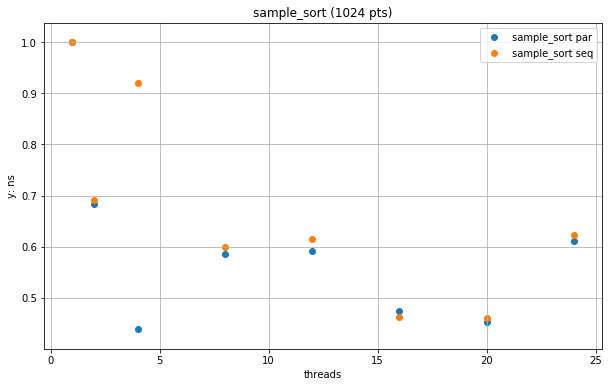

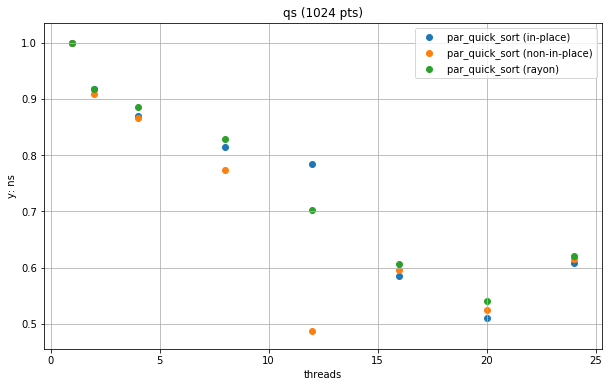

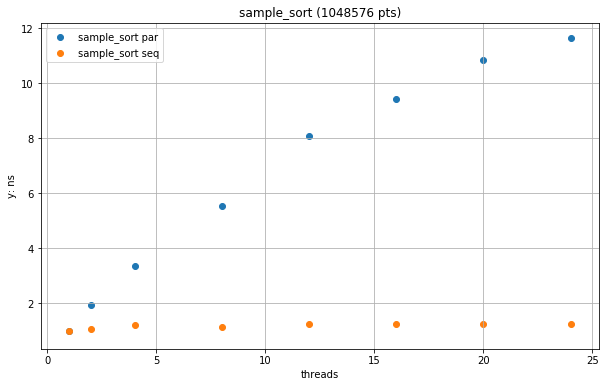

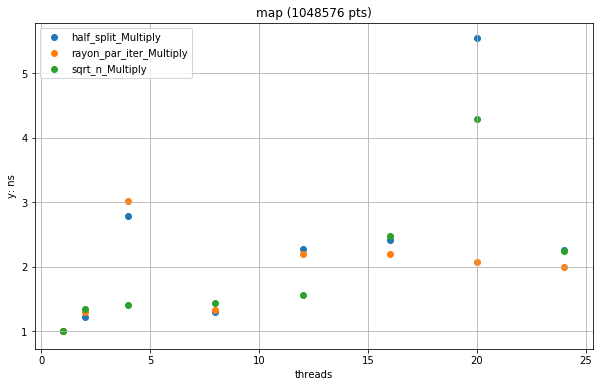

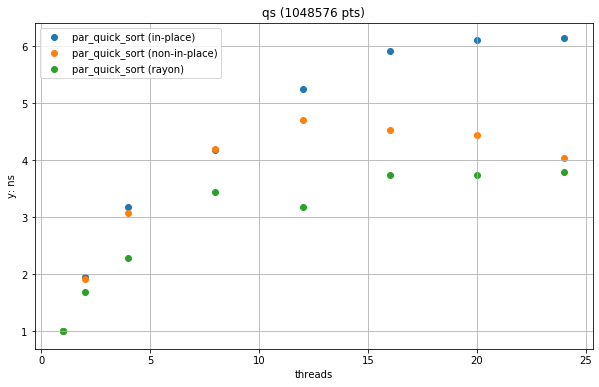

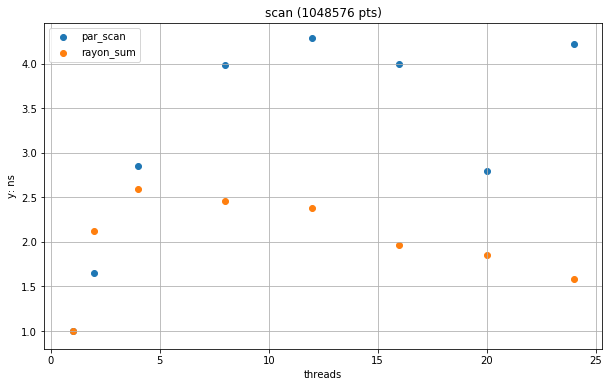

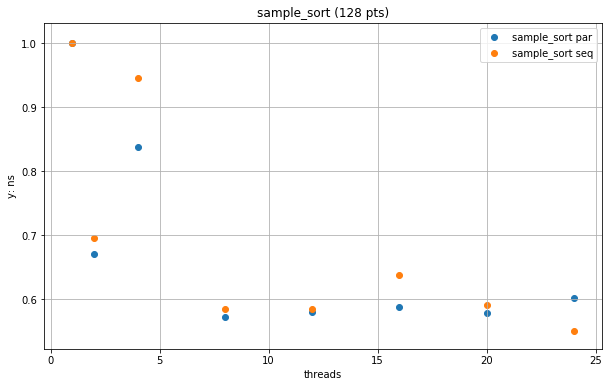

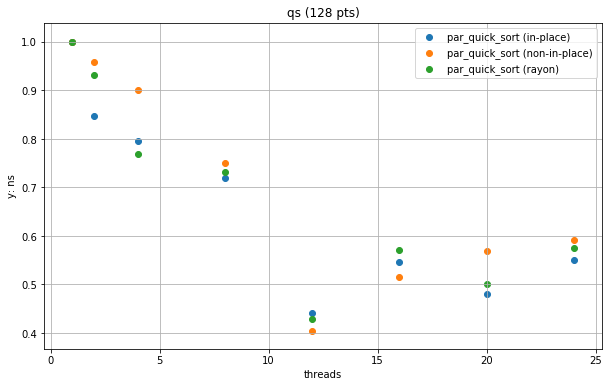

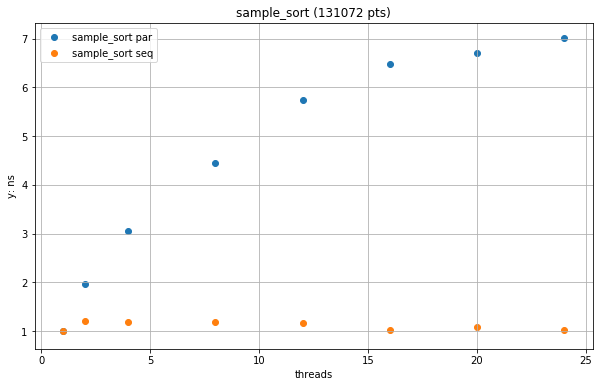

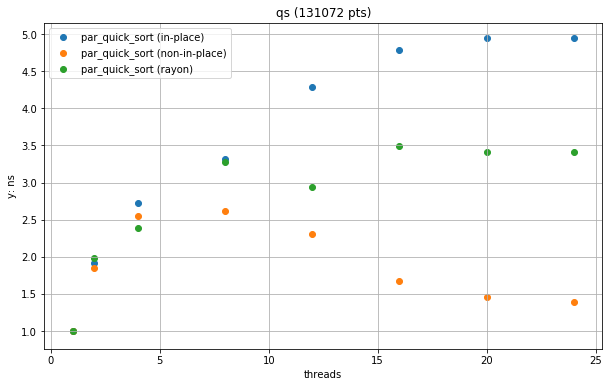

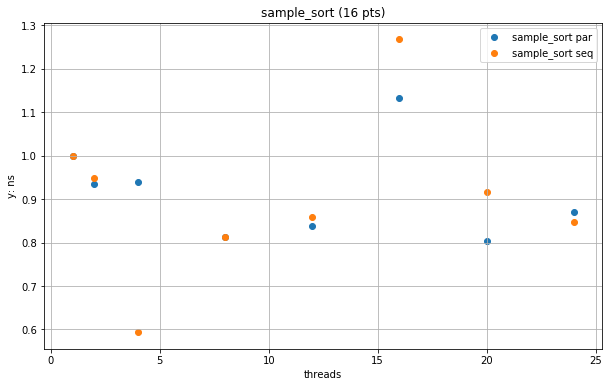

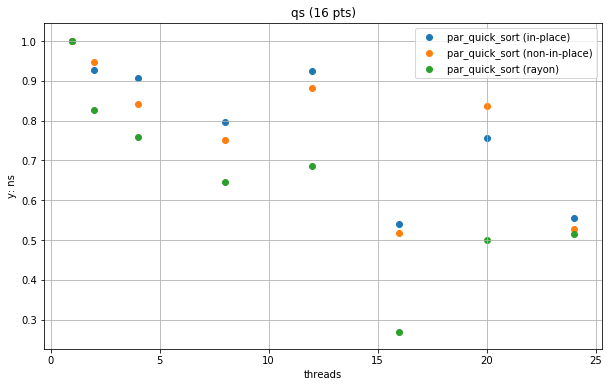

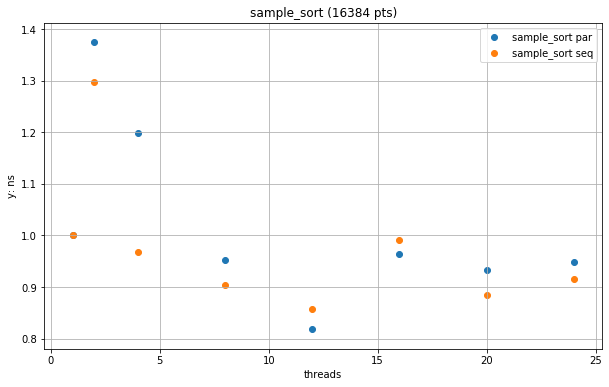

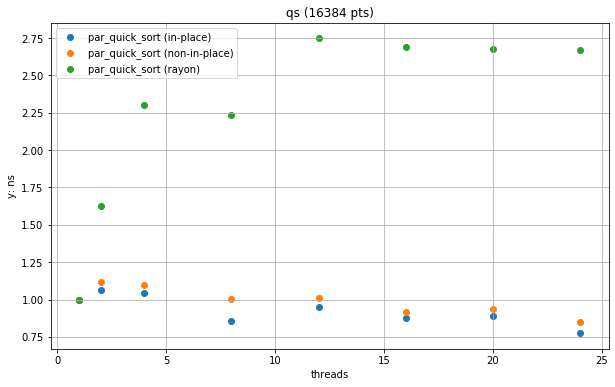

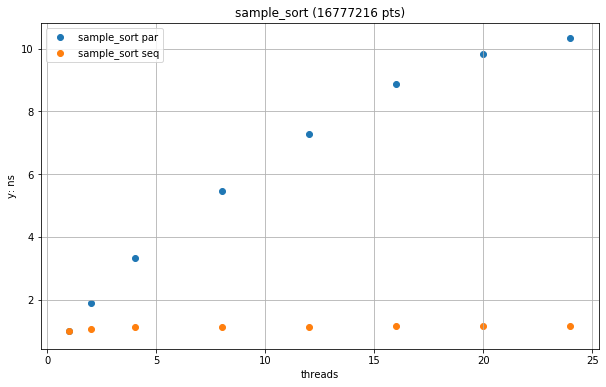

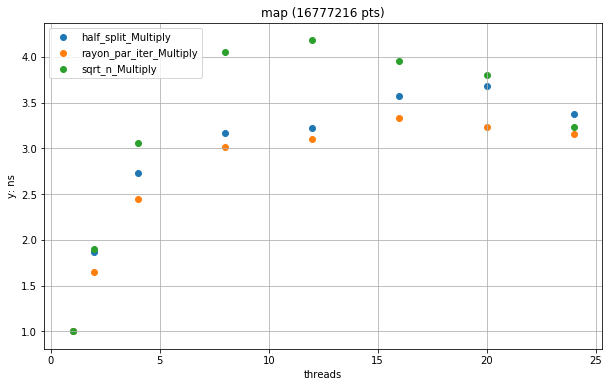

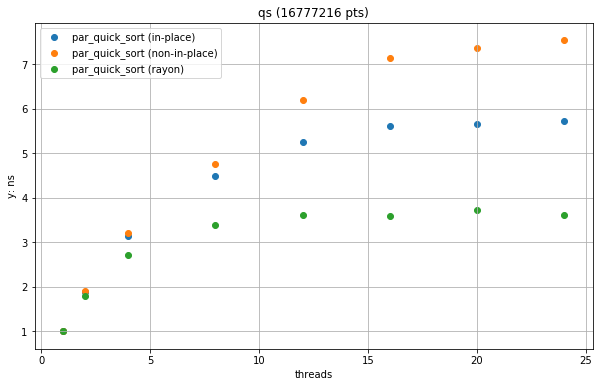

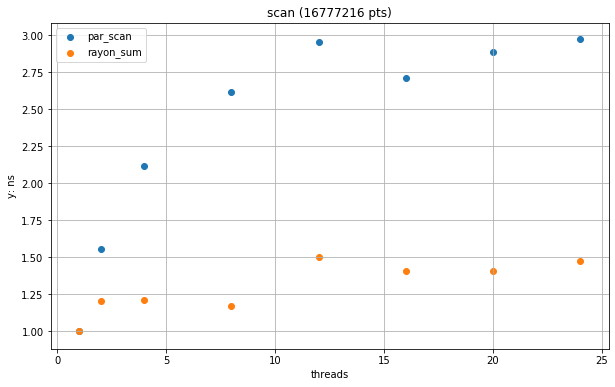

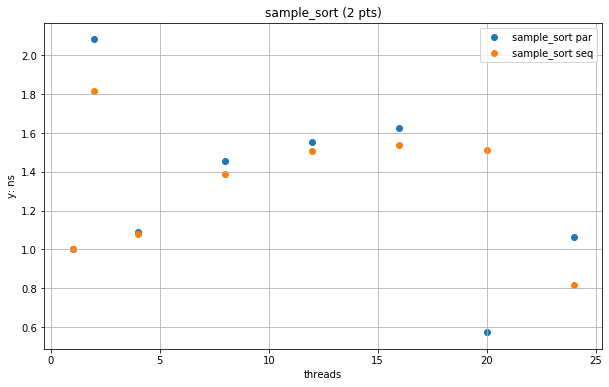

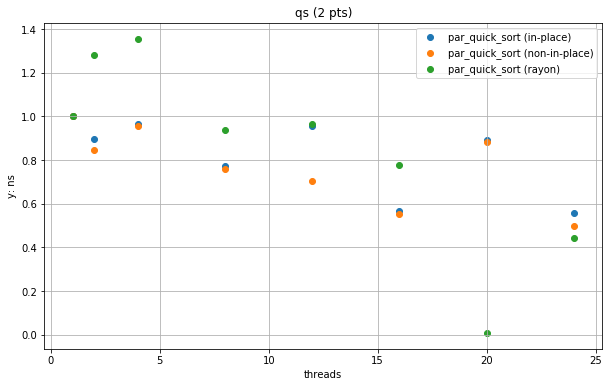

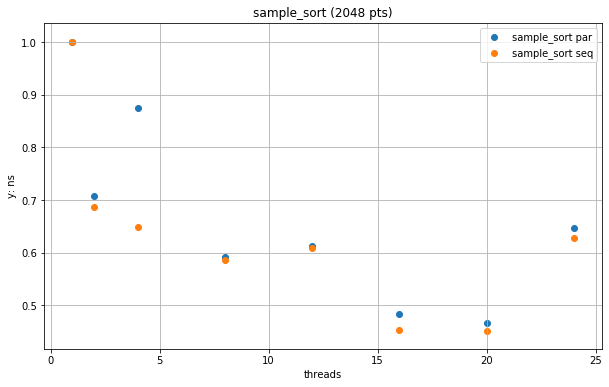

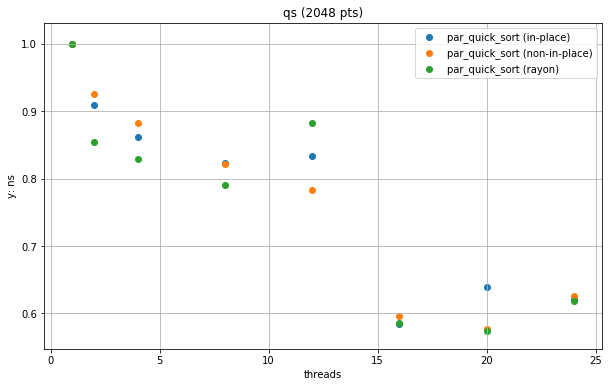

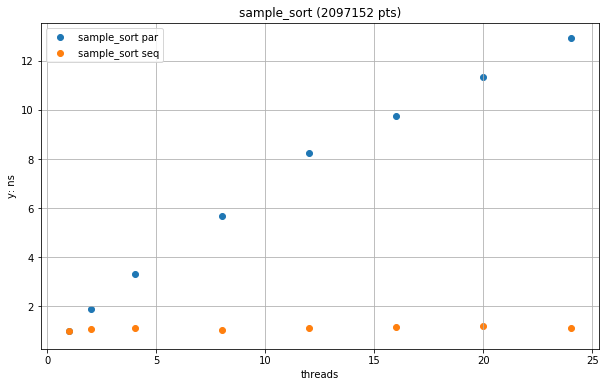

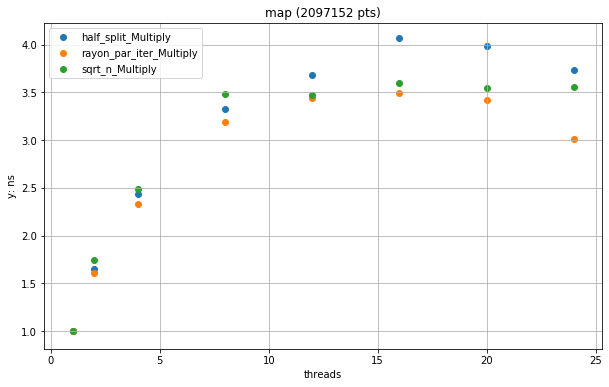

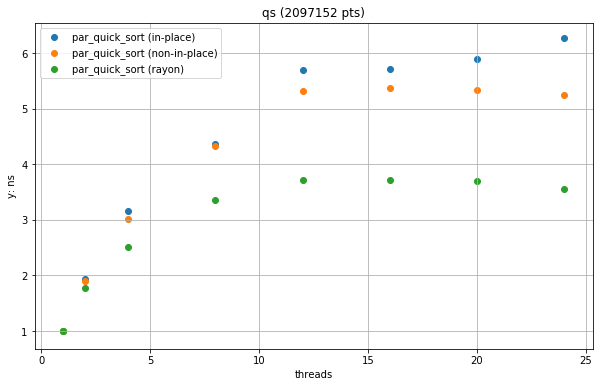

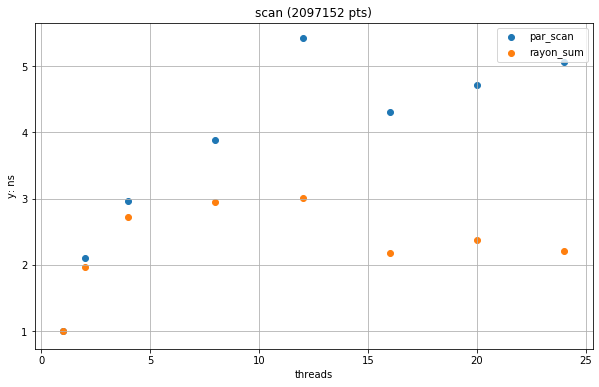

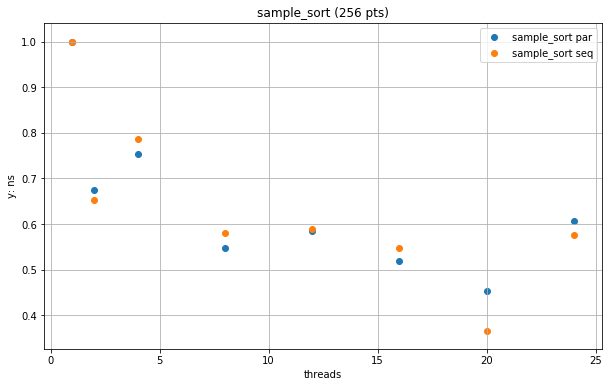

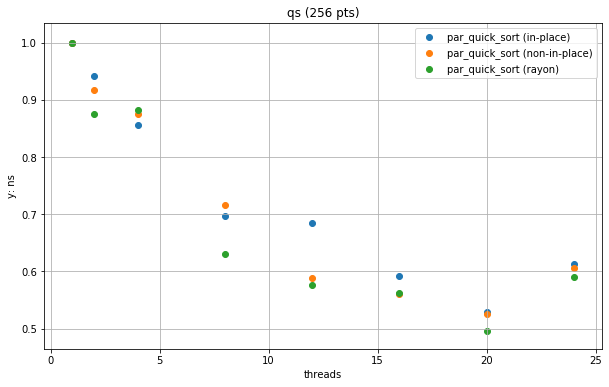

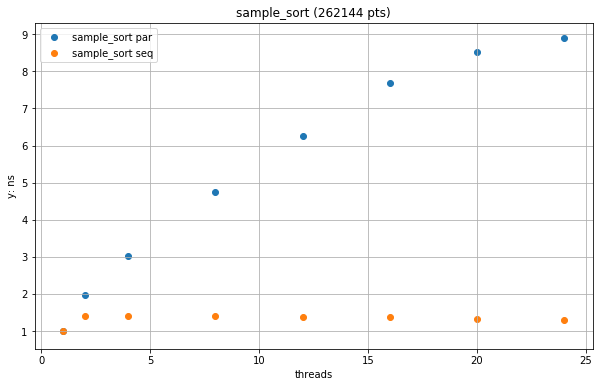

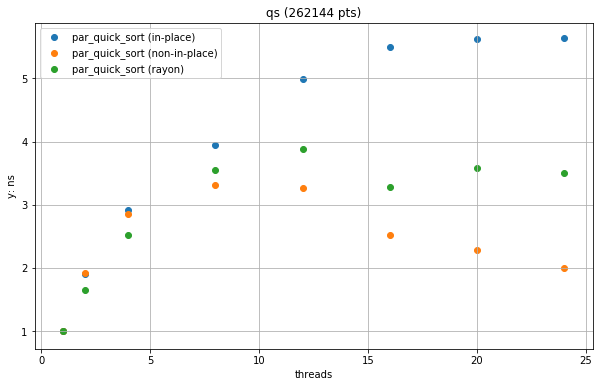

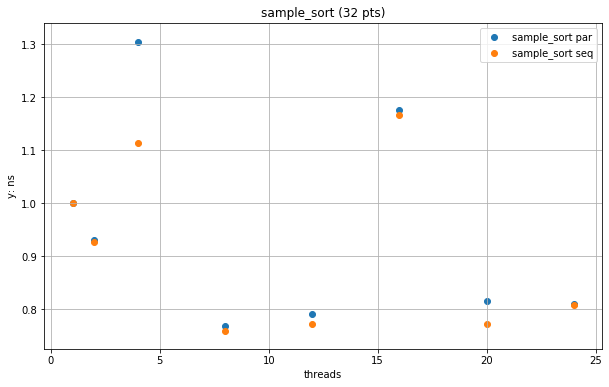

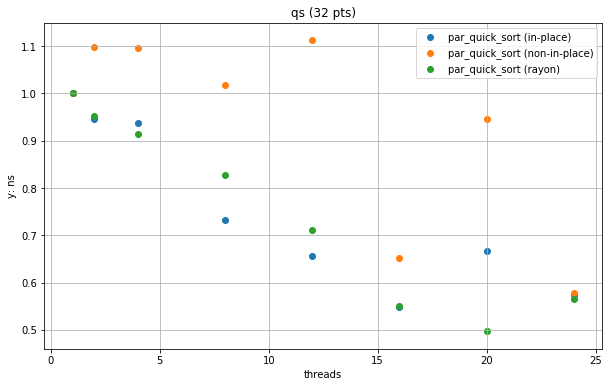

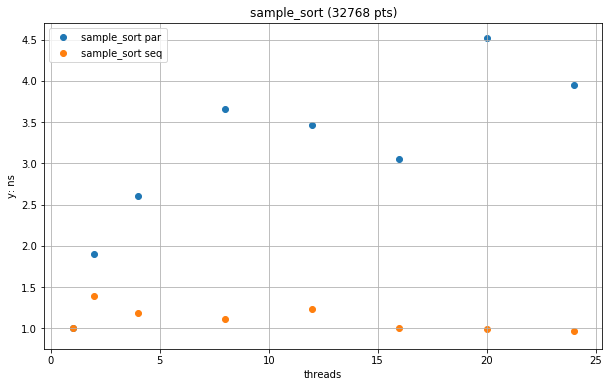

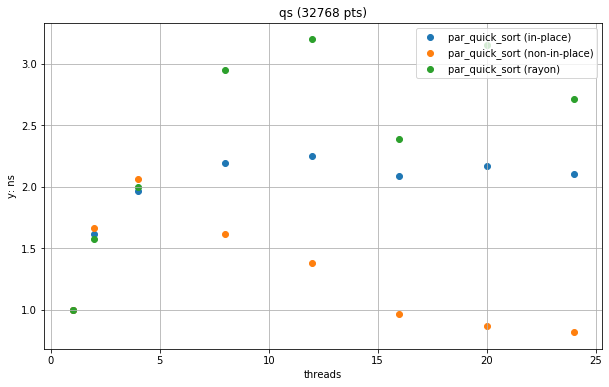

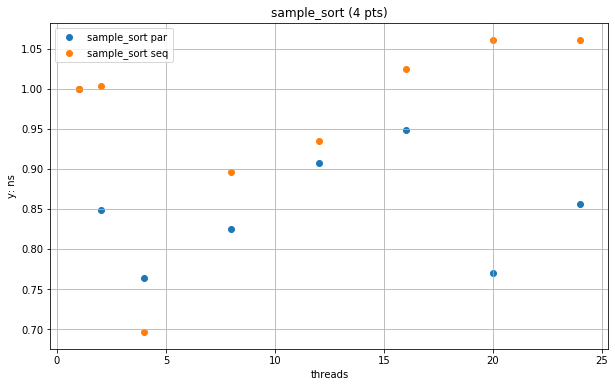

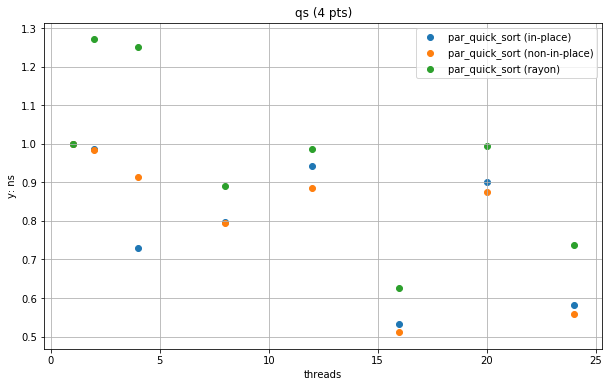

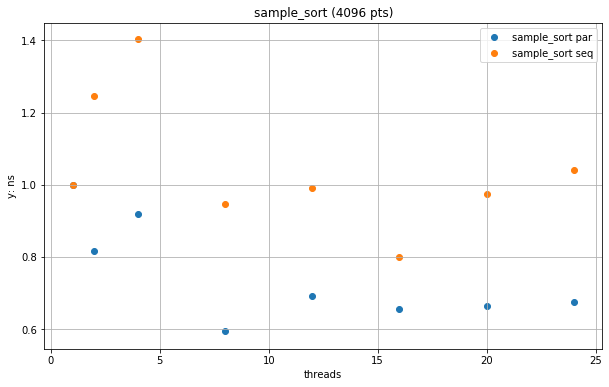

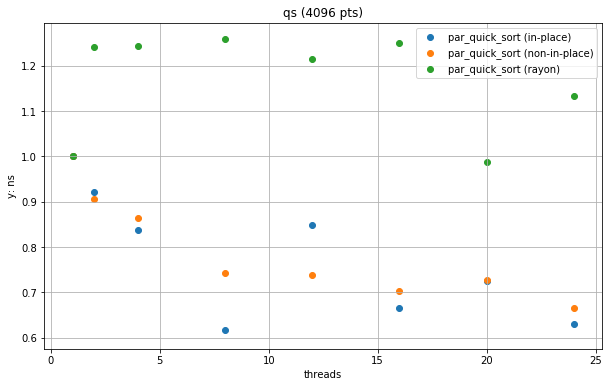

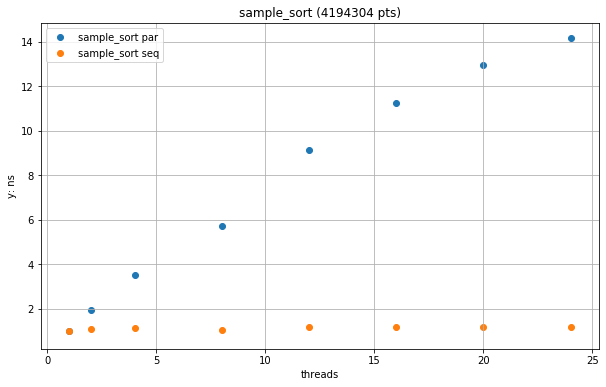

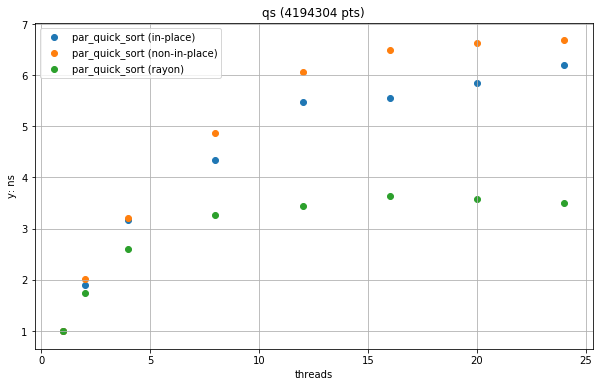

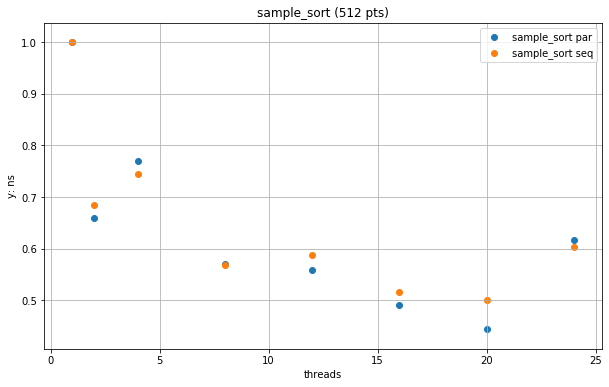

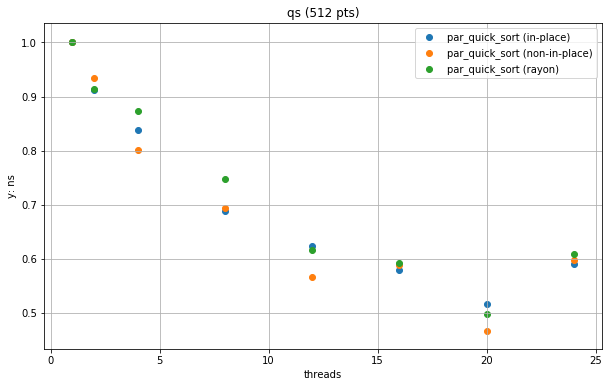

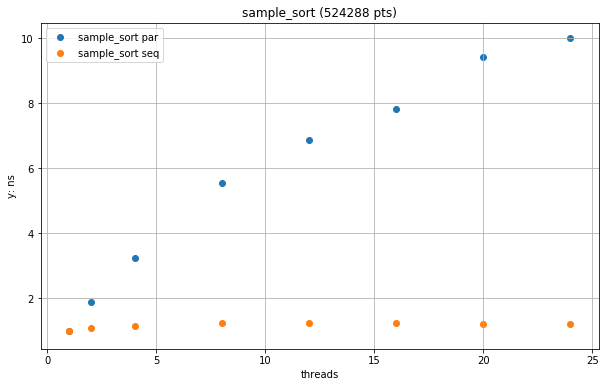

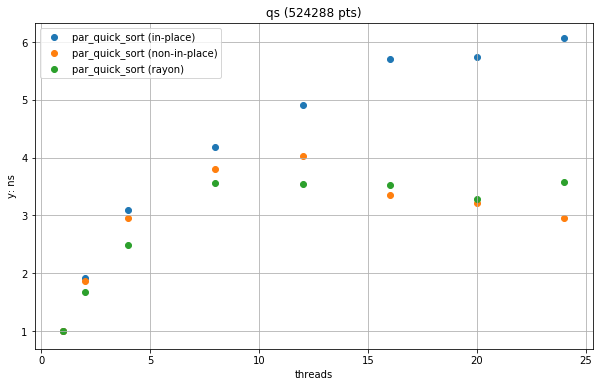

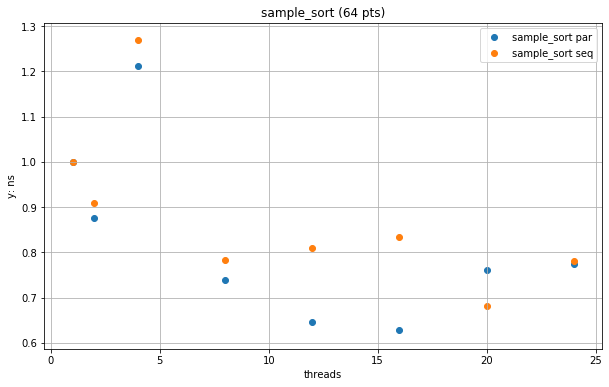

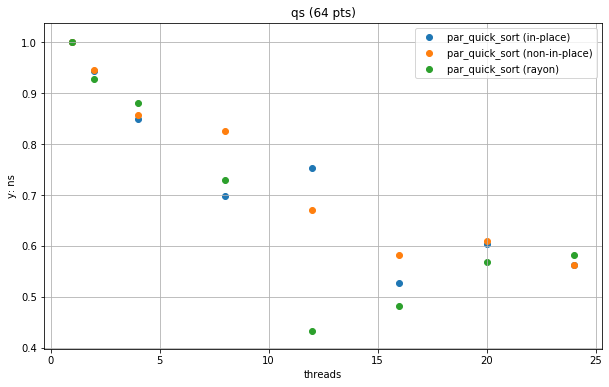

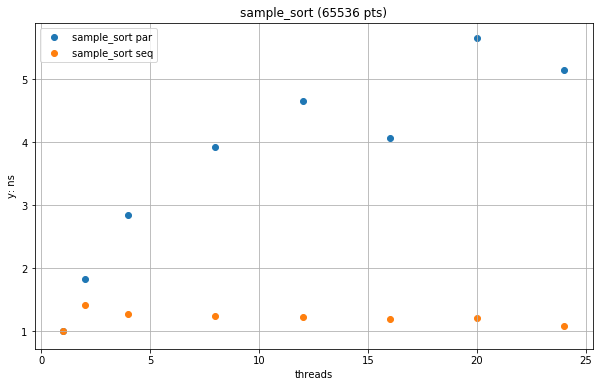

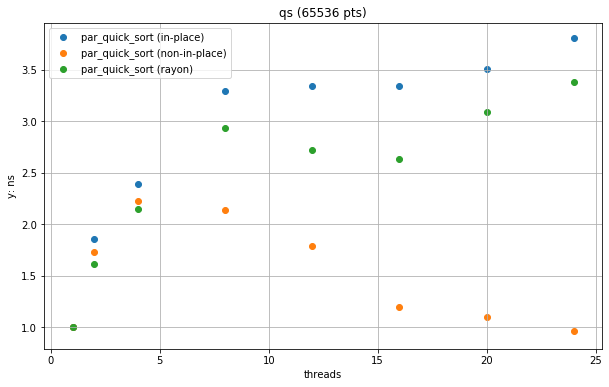

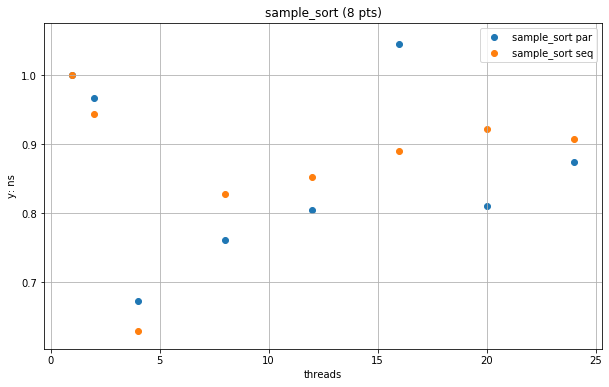

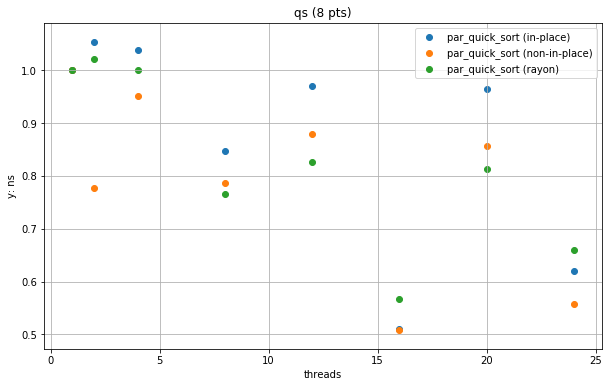

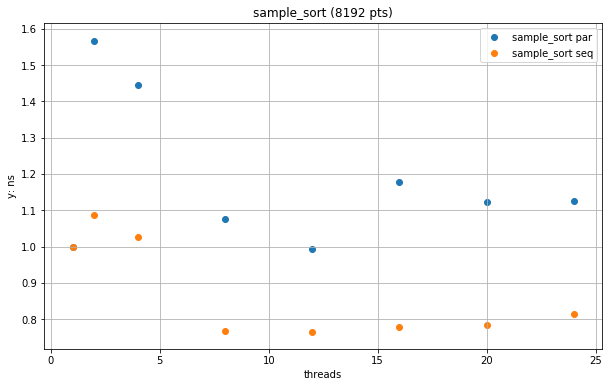

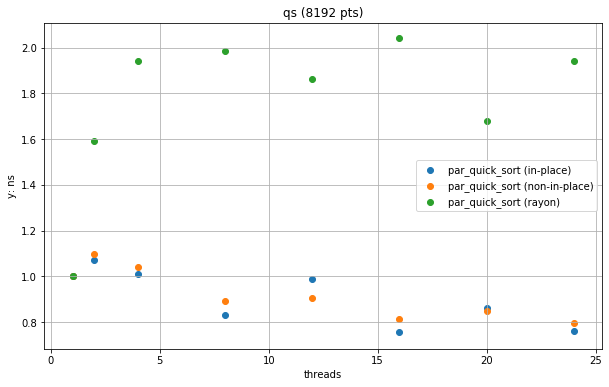

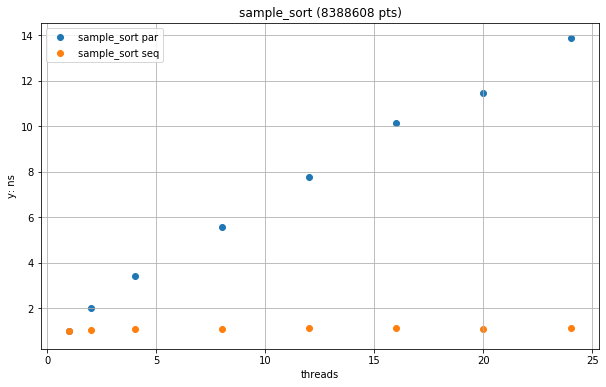

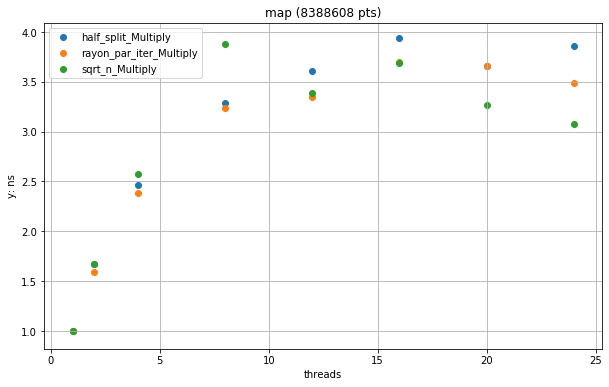

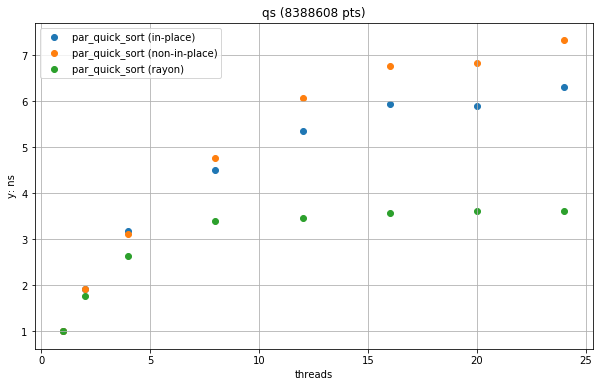

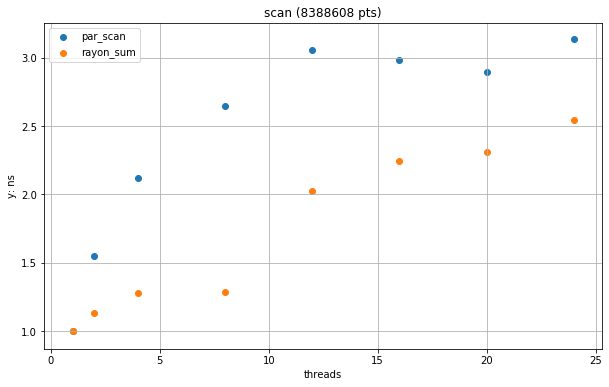

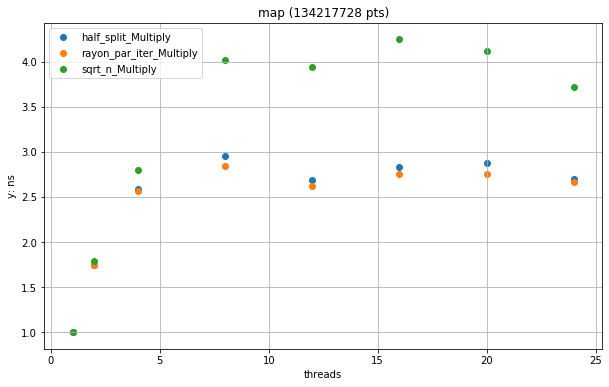

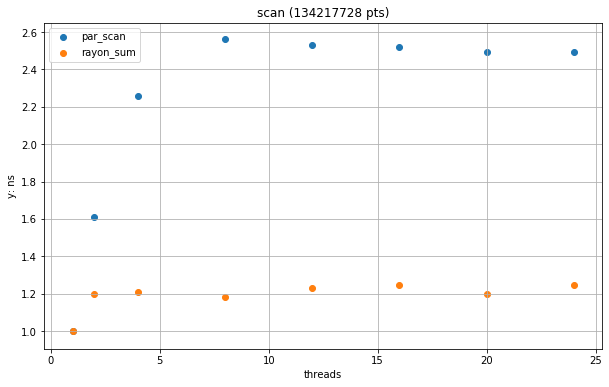

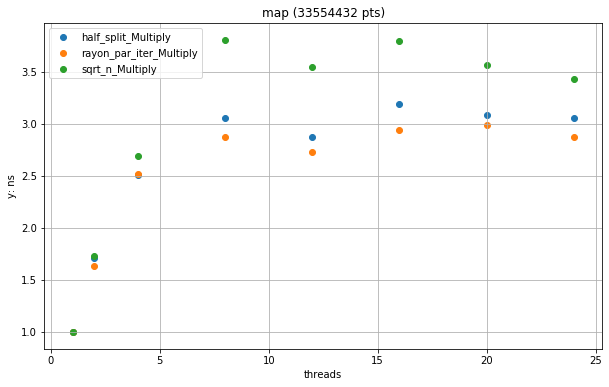

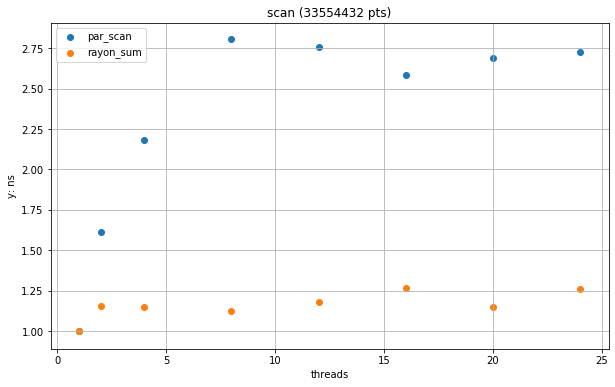

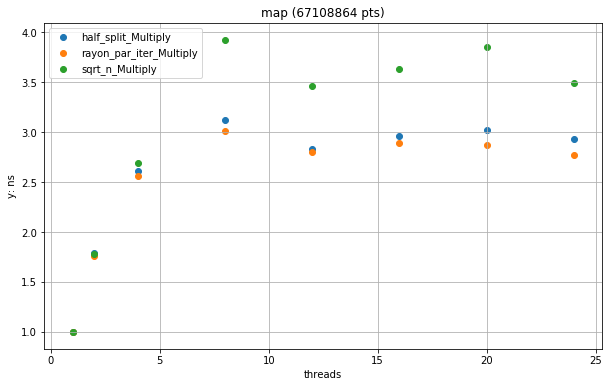

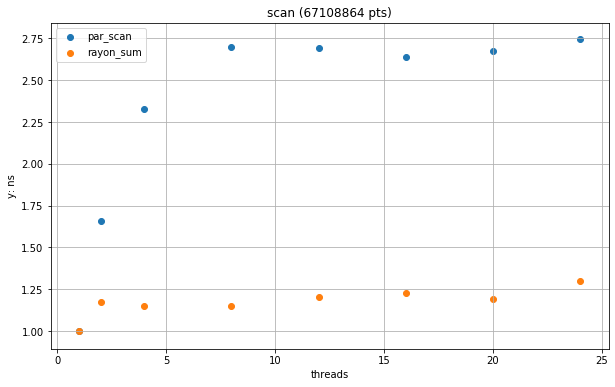

In [76]:
for size, size_d in result.items():
    for alg, alg_d in size_d.items():
        plt.figure(figsize=(10,6))
        plt.title(f"{alg} ({size} pts)")
        for ver, ver_d in alg_d.items():
            rr = result[size][alg][ver]
            plt.xlabel("threads")
            plt.ylabel("y: ns")
            plt.scatter(rr['x'], rr['y'], marker='o', label=ver)
            plt.grid(True)
        plt.legend()
        plt.show()